# Normalized Cross Correlation

<br></br>

When a sequence from an array used as a template (kernel) for correlation, the highest value in the correlated array
is going to be the placee that the template and the array match.

This behaviour of cross correlation method can be used to find partial images in a bigger image.

<br></br>


In [38]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, util 
from skimage.feature import match_template

---

## 1D Cross Correlation

<br></br>


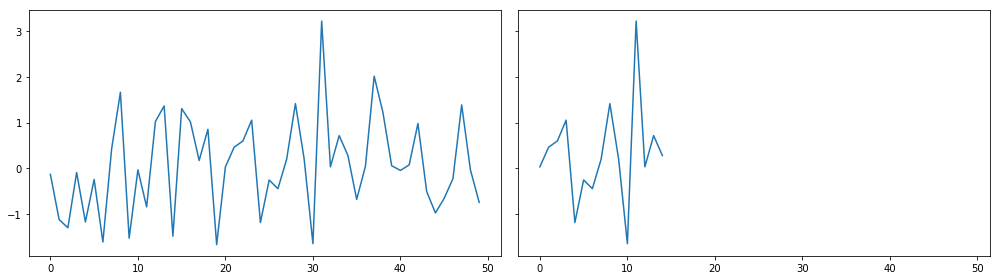

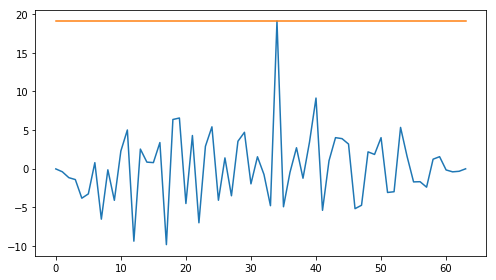

In [44]:
signal = np.random.randn(50)
filt = signal[20: 35]

fig, ax = plt.subplots(1,2, figsize=(14,4), sharex=True, sharey=True)
ax[0].plot(signal)
ax[1].plot(filt)
plt.tight_layout()
plt.show()

matched = np.correlate(signal, filt, 'full')

fig, ax = plt.subplots(1, figsize=(7,4))
ax.plot(matched)
matched.fill(max(matched))
ax.plot(matched)

plt.tight_layout()

plt.show()

---

## 2D Cross Correlation

<br></br>


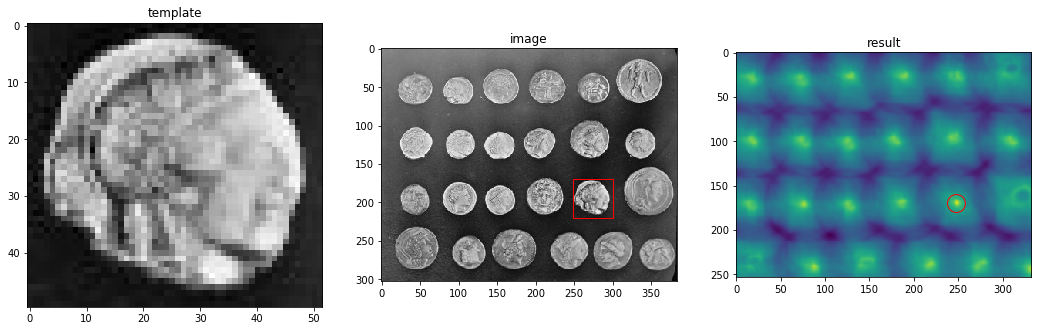

In [40]:
im = data.coins()
template = im[170:220, 248:300]

res = match_template(im, template)
ij = np.unravel_index(np.argmax(res), res.shape)
x, y = ij[::-1]

fig, ax = plt.subplots(1,3, figsize=(18,6))
ax[0].imshow(template,  cmap=plt.cm.gray)
ax[0].set_title('template')

ax[1].imshow(im, cmap=plt.cm.gray)
ax[1].set_title('image')
hcoin, wcoin = template.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax[1].add_patch(rect)

ax[2].imshow(res)
ax[2].set_title('result')
ax[2].autoscale(False)
ax[2].plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=18)

plt.show()